##  importing the libraries

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## Label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.mainroad=le.fit_transform(df.mainroad)
df.guestroom=le.fit_transform(df.guestroom)
df.basement=le.fit_transform(df.basement)
df.hotwaterheating=le.fit_transform(df.hotwaterheating)
df.airconditioning=le.fit_transform(df.airconditioning)
df.prefarea=le.fit_transform(df.prefarea)


In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Getting Dummies  

In [12]:
status=pd.get_dummies(df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [13]:
status=pd.get_dummies(df['furnishingstatus'],drop_first=True)
df=pd.concat([df,status],axis=1)

In [14]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished,0,1


In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [16]:
df=df.drop(['furnishingstatus'],axis=1)

In [17]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,1


In [18]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,1
8,0,0
9,0,1


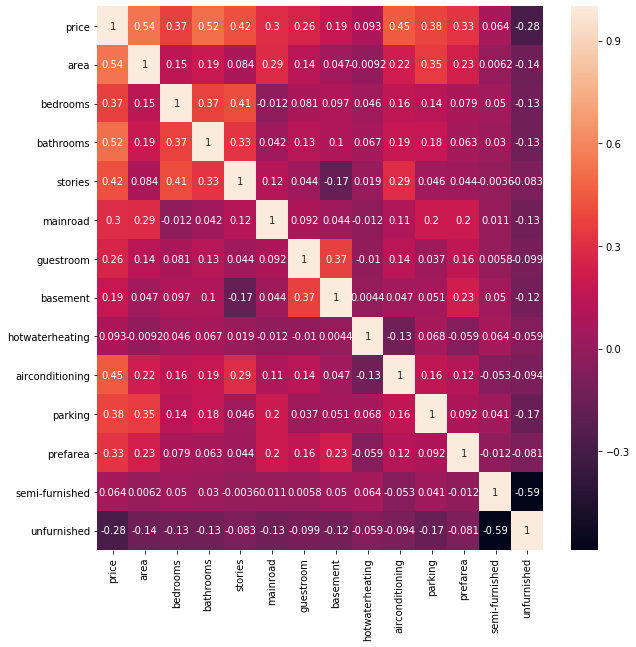

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [20]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [21]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

## Training the model

In [22]:
x=df[[ 'area', 'bathrooms', 'stories',
        'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea']]
y=df['price']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
linreg=LinearRegression()

In [27]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
linreg.coef_

array([2.87453470e+02, 9.80680002e+05, 5.40941059e+05, 5.05301174e+05,
       1.14214074e+06, 8.55636803e+05, 3.30772575e+05, 7.78873690e+05])

In [29]:
linreg.intercept_

110094.39877197426

In [30]:
y_pred=linreg.predict(x_test)

In [31]:
y_pred_train=linreg.predict(x_train)

In [32]:
from sklearn import metrics

In [33]:
metrics.r2_score(y_test,y_pred)

0.5994629853240458

## Stats Model

In [41]:
x_train_sm=x_train
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train_sm)

In [42]:
x_train_sm=sm.add_constant(x_train)
x_train_sm

,const,area,bathrooms,stories,basement,hotwaterheating,airconditioning,parking,prefarea
227,1.0,6000,1,1,1,0,1,1,0
319,1.0,3000,1,3,1,0,1,2,0
367,1.0,3630,1,1,0,0,1,0,0
515,1.0,3210,1,2,1,0,0,0,0
143,1.0,4800,2,3,1,1,0,0,0
334,1.0,3290,1,1,0,1,0,1,0
479,1.0,3660,1,2,0,0,0,0,0
420,1.0,4120,1,2,0,0,0,0,0
475,1.0,3000,1,2,0,0,0,0,0
53,1.0,5150,2,4,0,0,1,2,0


In [43]:
lr=sm.OLS(y_train,x_train_sm).fit()

In [44]:
lr.params

const              1.100944e+05
area               2.874535e+02
bathrooms          9.806800e+05
stories            5.409411e+05
basement           5.053012e+05
hotwaterheating    1.142141e+06
airconditioning    8.556368e+05
parking            3.307726e+05
prefarea           7.788737e+05
dtype: float64

In [45]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     100.4
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           4.43e-88
Time:                        19:51:06   Log-Likelihood:                -5828.4
No. Observations:                 381   AIC:                         1.167e+04
Df Residuals:                     372   BIC:                         1.171e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.101e+05   2.03e+05     

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,bathrooms,7.82
0,area,5.94
2,stories,5.64
6,parking,1.89
5,airconditioning,1.73
3,basement,1.68
7,prefarea,1.44
4,hotwaterheating,1.11
